In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from statsmodels.formula.api import ols

plt.rcParams['figure.figsize'] = [16, 12]

# Load data

In [2]:
df = pd.read_csv("Data/Advertising.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


### [2.1]

In [4]:
print("\n[!] TV")
TV_lin_regress = ols("Sales ~ TV", df).fit()
print(TV_lin_regress.summary().tables[1])

print("\n[!] Newspaper")
NP_lin_regress = ols("Sales ~ Newspaper", df).fit()
print(NP_lin_regress.summary().tables[1])

print("\n[!] Radio")
RD_lin_regress = ols("Sales ~ Radio", df).fit()
print(RD_lin_regress.summary().tables[1])


[!] TV
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053

[!] Newspaper
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087

[!] Radio
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


In [5]:
mul_lin_regress = ols("Sales ~ TV + Newspaper + Radio", df).fit()
print(mul_lin_regress.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206


In [6]:
df.corr() # R^2 = r^2

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### [2.2]

In [7]:
print(mul_lin_regress.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           1.58e-96
Time:                        06:39:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

### [2.3]

In [8]:
X = df.iloc[:,0:3].values
y = df.iloc[:,3].values

In [9]:
model = LinearRegression()
rfe = RFECV(model)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


### [2.4]

In [10]:
y_ = mul_lin_regress.predict(df)
print("R^2 statistic:           ", r2_score(y, y_))
print("Residual Standard Error: ", np.std((y, y_), ddof=2))

R^2 statistic:            0.8972106381789522
Residual Standard Error:  5.081613382142764


In [11]:
# Fit multiple linear regression
X = df[['Radio', 'TV']].values
y = df.Sales.values

RD_TV_lin_regress = LinearRegression().fit(X,y)

print(RD_TV_lin_regress.coef_)
print(RD_TV_lin_regress.intercept_)

[0.18799423 0.04575482]
2.9210999124051362


In [12]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
df[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [13]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] = RD_TV_lin_regress.predict(np.stack([B1[i,j], B2[i,j]]).reshape(1, -1))


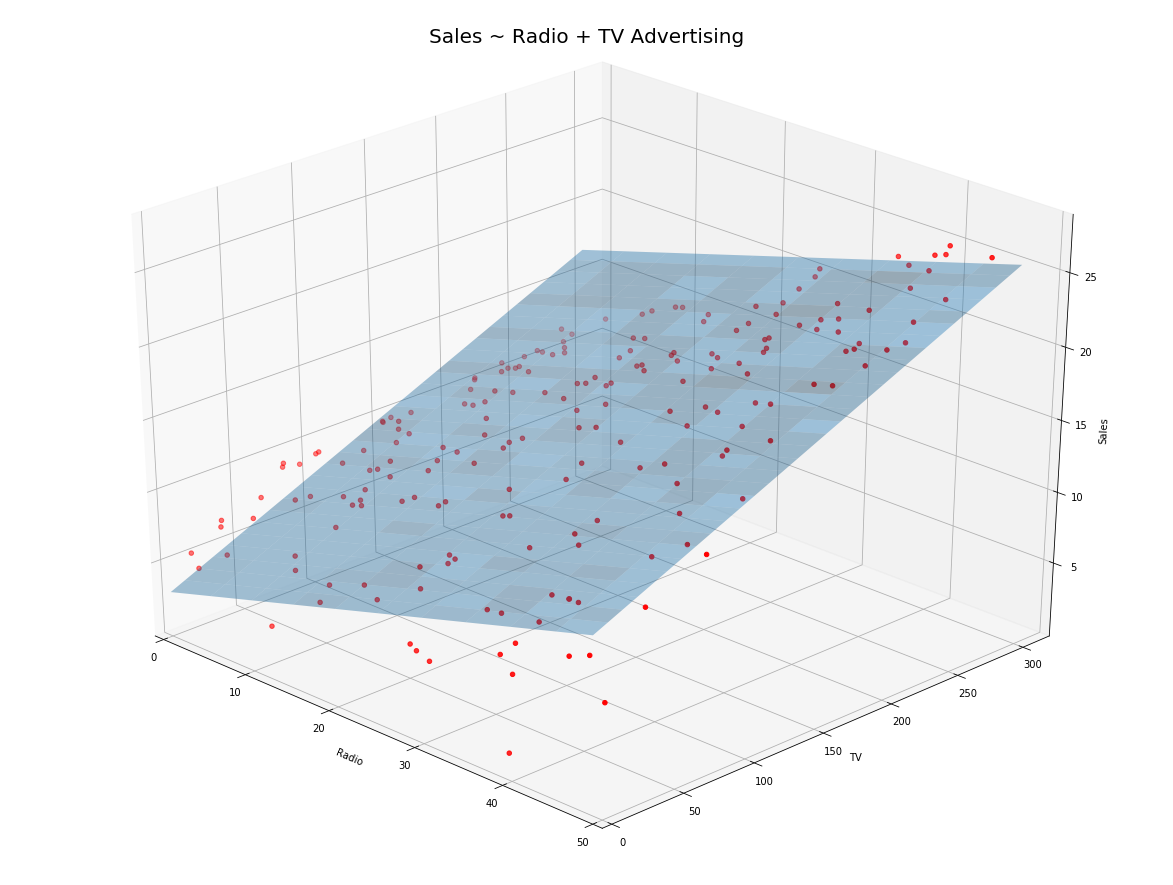

In [17]:
# Create plot
fig = plt.figure()
fig.suptitle('Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(df.Radio, df.TV, df.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

ax.view_init(30, -45)

### [2.5]

/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


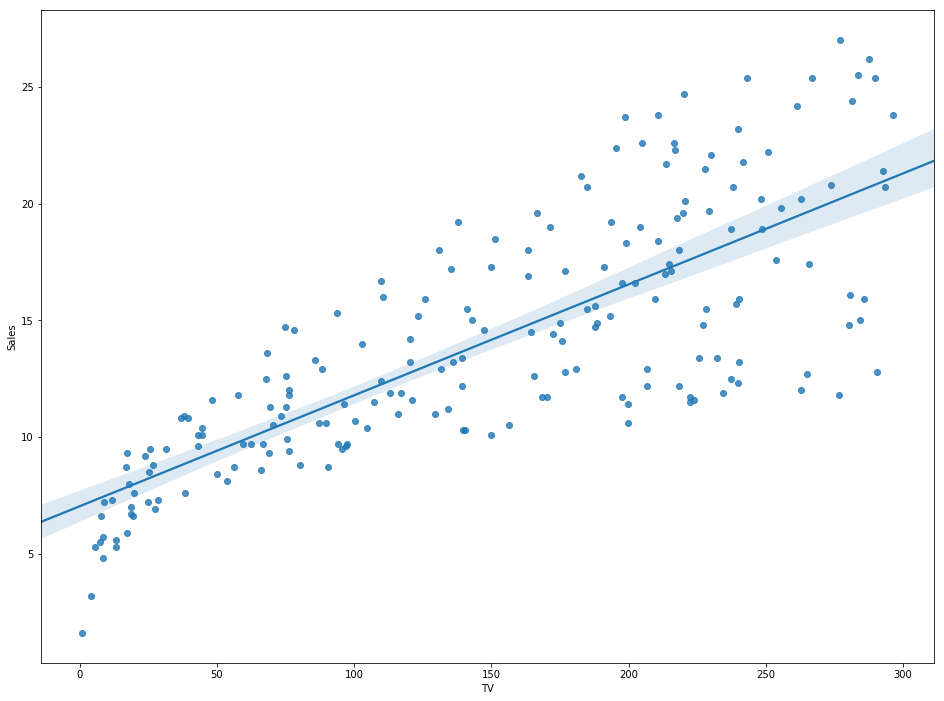

In [18]:
sns.regplot(x="TV", y="Sales", data=df)

# Laboratories

The Boston dataset variables description:
```
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
```

In [148]:
df = pd.read_csv("Data/Boston.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


### 1. Fit a multiple linear regression model, regress medv on all the predictors.

### 2. Perform backward selection, drop all insignificant predictors (p > 0.05). Which predictors were dropped?

### 3. Below is an example of how to calulate cross validation R^2 statistic along with estimated 95% confidence interval. Calculate it for the linear regression model fitted on the 8 selected predictors.

In [144]:
X = df[['crim', 'zn', 'indus',
        'chas', 'nox', 'rm',
        'age', 'dis', 'rad',
        'tax', 'ptratio', 'black',
        'lstat']].values
y = df.medv.values
X, y = shuffle(X, y)

scores = cross_val_score(LinearRegression(), X, y, cv=3)
print("R^2 statistic: {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std() * 2))

R^2 statistic: 0.69 (+/- 0.04)
